<a href="https://colab.research.google.com/github/justyna-b/175IC-machine-learning/blob/main/Zad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liczba probek: 150
Ksztalt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy klas: ['setosa' 'versicolor' 'virginica']
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2     0.0
1           4.9          3.0           1.4          0.2     0.0
2           4.7          3.2           1.3          0.2     0.0
3           4.6          3.1           1.5          0.2     0.0
4           5.0          3.6           1.4          0.2     0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



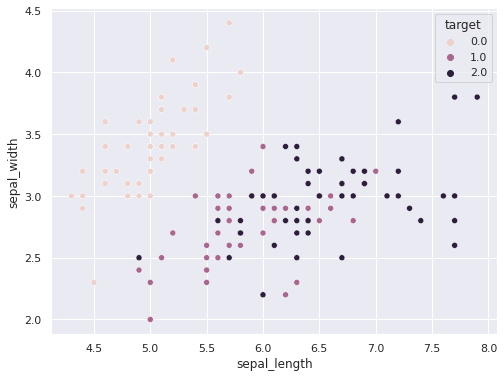

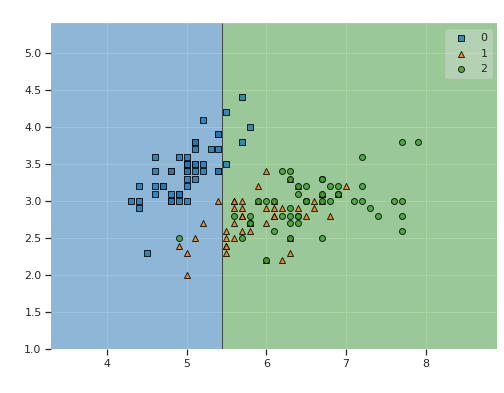

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



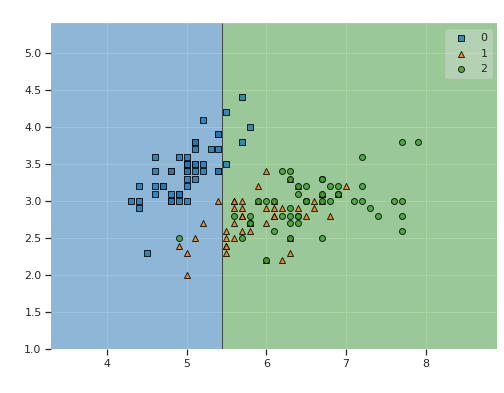

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



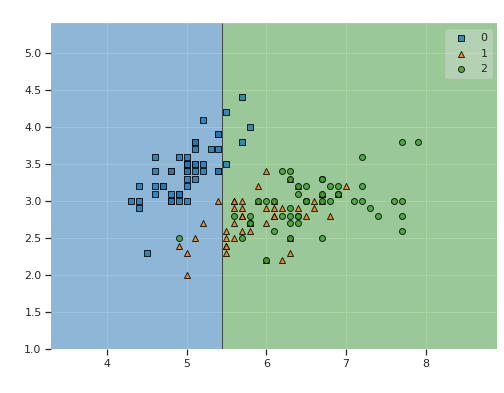

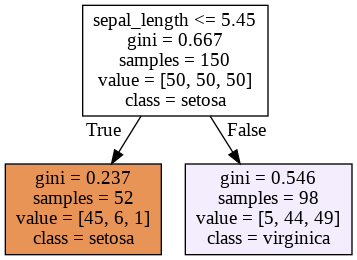

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.datasets import load_iris
import sklearn
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

sns.set()
np.random.seed(42)

raw_data = load_iris()
all_data = raw_data.copy()
 
data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ','_' )[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']
 
print(f'Liczba probek: {len(data)}')
print(f'Ksztalt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy klas: {target_names}')

df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
print(df.head())
 
plt.figure(figsize=(8,6))
sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df)
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

classifier = sklearn.tree.DecisionTreeClassifier(max_depth=1)
classifier.fit(data, target)

# acc = classifier.score(data, target)
# plt.figure(figsize=(8,6))
# plot_decision_regions(data, target, classifier)

# plt.xlabel('sepal_length(cm)', color='white')
# plt.ylabel('sepal_width (cm)', color='white')
# plt.title(f'Drzewo decyzyjne : max_depth=1 , accuracy: {acc * 100:.2f}%', color='white')
# plt.show()

dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, feature_names=feature_names[:2], class_names=target_names, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=300)

def make_decision_tree(max_depth = 1):
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(data,target)
 
    dot_data = StringIO()
    export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2], class_names=target_names, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
 
    acc =classifier.score(data,target)
    
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(np.array(data), np.array(target).reshape(150).astype(np.integer), classifier)
    plt.xlabel('sepal length (cm)', color='white')
    plt.ylabel('sepal length (cm)', color='white')
    plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%', color='white')
    plt.show()
 
    return Image(graph.create_png(), width=200 + max_depth * 120)

make_decision_tree()
make_decision_tree()
make_decision_tree()




